<a href="https://colab.research.google.com/github/omniaghazy/Data-Preprocessing/blob/main/LogisticRegression(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df = pd.read_csv("/content/titanic-Dataset.csv")

In [308]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [310]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [311]:
df['Age'] = df[['Age','Pclass']].apply(impute_train_age,axis=1)

/tmp/ipython-input-3981110378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3981110378.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [312]:
# df["Age"] = df["Age"].fillna(df["Age"].mean())


In [313]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [314]:
LISTY1=[]
for index, row in df.iterrows():
  if row['Pclass'] == 1 and pd.notna(row['Cabin']):
    LISTY1.append(row['Cabin'])
mode_cabin1 = max(set(LISTY1), key = LISTY1.count)
print(f"mode_cabin1 = {mode_cabin1}")


LISTY2=[]
for index, row in df.iterrows():
  if row['Pclass'] == 2 and pd.notna(row['Cabin']):
    LISTY2.append(row['Cabin'])
mode_cabin2 = max(set(LISTY2), key = LISTY2.count)
print(f"mode_cabin2 = {mode_cabin2}")



LISTY3=[]
for index, row in df.iterrows():
  if row['Pclass'] == 3 and pd.notna(row['Cabin']):
    LISTY3.append(row['Cabin'])
mode_cabin3 = max(set(LISTY3), key = LISTY3.count)
print(f"mode_cabin3 = {mode_cabin3}")

mode_cabin1 = B96 B98
mode_cabin2 = F2
mode_cabin3 = G6


In [315]:
mode_cabin1 = "B96"
mode_cabin2 = "F2"
mode_cabin3 = "G6"

In [316]:
df['Cabin'].dtype

dtype('O')

In [317]:
for index, row in df.iterrows():
  if pd.isna(row['Cabin']):
    if row['Pclass'] == 3:
      df.loc[index, 'Cabin'] = mode_cabin3
    elif row['Pclass'] == 2:
      df.loc[index, 'Cabin'] = mode_cabin2
    elif row['Pclass'] == 1:
      df.loc[index, 'Cabin'] = mode_cabin1

In [318]:
df['Cabin'].isna().sum()

np.int64(0)

In [319]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [320]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [322]:
for col in df.select_dtypes(exclude="object").columns:
  display(df[col].describe())
  print(f"nunique = {df[col].nunique()}")
  print(f"{df[col].isna().sum()}")
  print("==" *23)

,PassengerId
count,891.000000
mean,446.000000
std,257.353842
min,1.000000
25%,223.500000
50%,446.000000
75%,668.500000
max,891.000000


nunique = 891
0


,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


nunique = 2
0


,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


nunique = 3
0


,Age
count,891.000000
mean,29.066409
std,13.244532
min,0.420000
25%,22.000000
50%,26.000000
75%,37.000000
max,80.000000


nunique = 88
0


,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


nunique = 7
0


,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


nunique = 7
0


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


nunique = 248
0


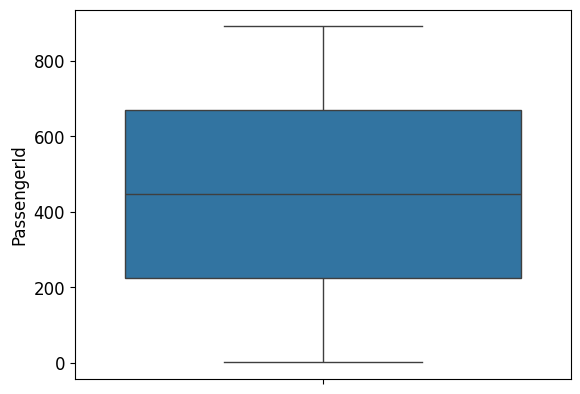

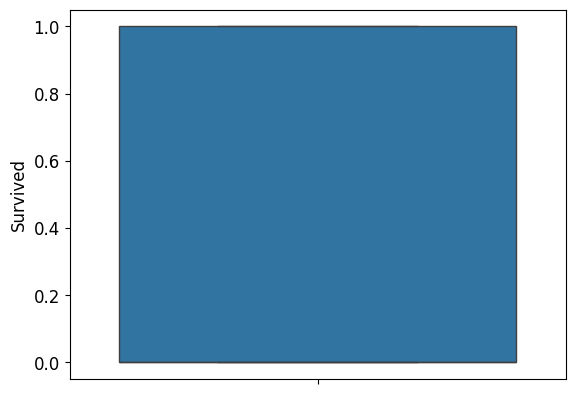

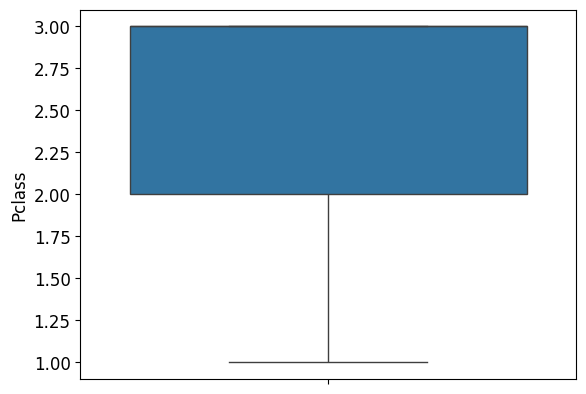

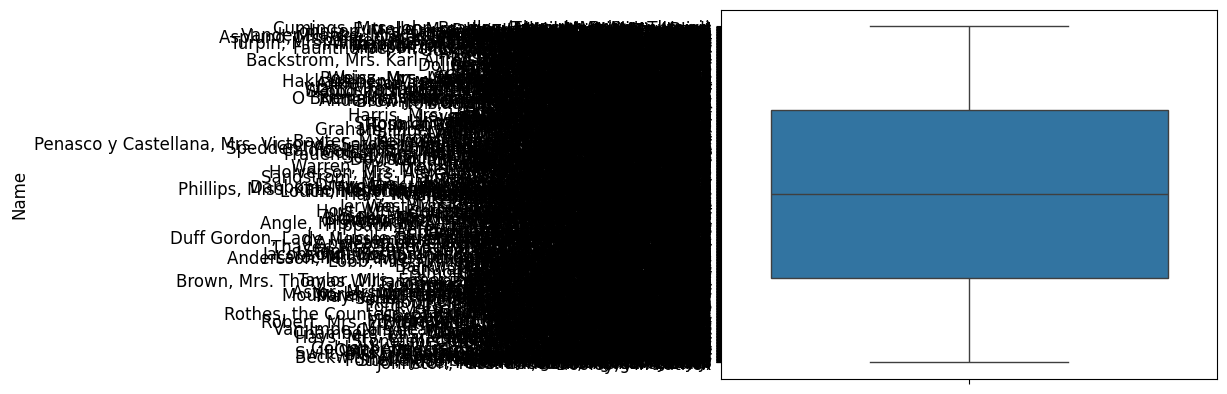

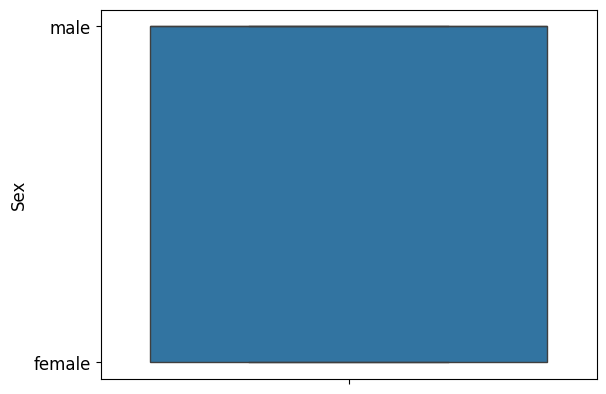

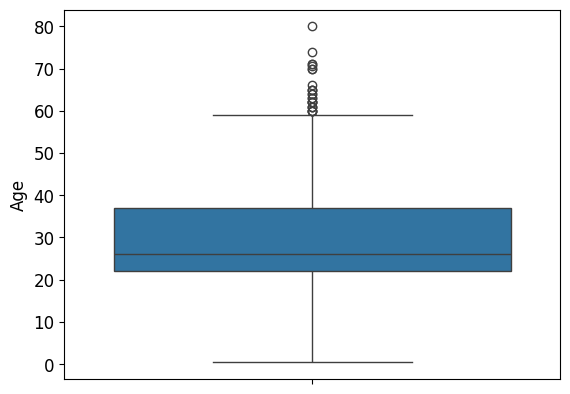

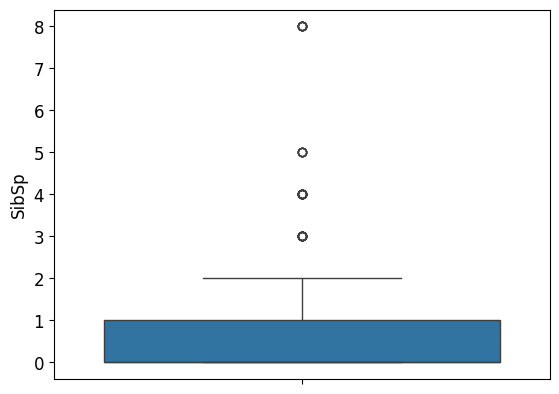

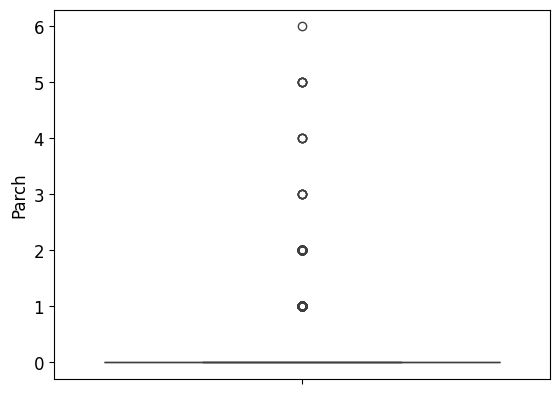

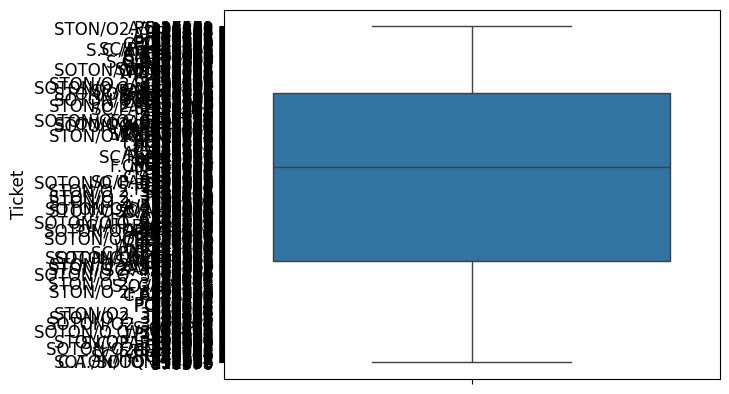

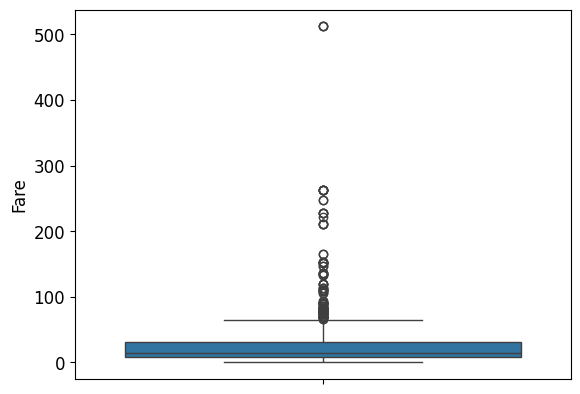

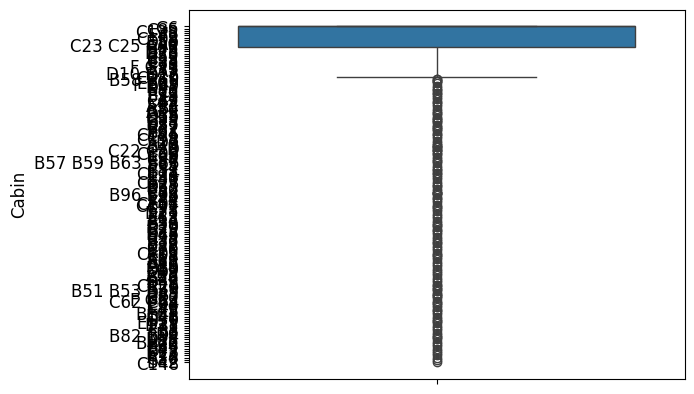

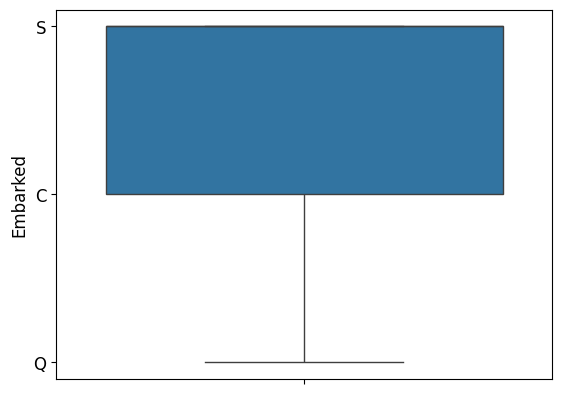

In [323]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [324]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [325]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [326]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [327]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [328]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [329]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [330]:
df.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [331]:
for col in df.select_dtypes("object").columns:
  df[col] = LabelEncoder.fit_transform(df[col])

In [332]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,82,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,56,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,2


In [333]:
df.drop(columns=["Name", "Ticket","PassengerId"], inplace=True)

In [334]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,2
1,1,1,0,38.0,1,0,71.2833,82,0
2,1,3,0,26.0,0,0,7.9250,146,2
3,1,1,0,35.0,1,0,53.1000,56,2
4,0,3,1,35.0,0,0,8.0500,146,2


In [335]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,-0.253803,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,0.806640,0.162098
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,0.081913,0.108262
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,-0.345512,-0.011245
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,0.072885,0.068230
Parch,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.021678,0.039798
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,-0.556123,-0.224719
Cabin,-0.253803,0.806640,0.081913,-0.345512,0.072885,0.021678,-0.556123,1.000000,0.248813
Embarked,-0.167675,0.162098,0.108262,-0.011245,0.068230,0.039798,-0.224719,0.248813,1.000000


In [336]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,2
1,1,1,0,38.0,1,0,71.2833,82,0
2,1,3,0,26.0,0,0,7.9250,146,2
3,1,1,0,35.0,1,0,53.1000,56,2
4,0,3,1,35.0,0,0,8.0500,146,2


In [337]:
df.groupby("Survived").mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,,,,,,,,
0,2.531876,0.852459,29.560109,0.553734,0.329690,22.117887,132.726776,1.641166
1,1.950292,0.318713,28.273889,0.473684,0.464912,48.395408,112.435673,1.368421


In [338]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [339]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,2
1,1,1,0,38.0,1,0,71.2833,82,0
2,1,3,0,26.0,0,0,7.9250,146,2
3,1,1,0,35.0,1,0,53.1000,56,2
4,0,3,1,35.0,0,0,8.0500,146,2
5,0,3,1,24.0,0,0,8.4583,146,1
6,0,1,1,54.0,0,0,51.8625,130,2
7,0,3,1,2.0,3,1,21.0750,146,2
8,1,3,0,27.0,0,2,11.1333,146,2
9,1,2,0,14.0,1,0,30.0708,142,0


In [340]:
from sklearn.model_selection import train_test_split

x = df[["Age", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Cabin"]]
y = df[["Survived"]]



In [341]:
df['Parch'].value_counts(normalize= True)


,proportion
Parch,
0,0.760943
1,0.132435
2,0.089787
5,0.005612
3,0.005612
4,0.004489
6,0.001122


In [342]:
x.drop(columns=["Parch"],inplace= True)

/tmp/ipython-input-1869073207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=["Parch"],inplace= True)


In [343]:
x.head()

,Age,Pclass,Sex,SibSp,Fare,Embarked,Cabin
0,22.0,3,1,1,7.2500,2,146
1,38.0,1,0,1,71.2833,0,82
2,26.0,3,0,0,7.9250,2,146
3,35.0,1,0,1,53.1000,2,56
4,35.0,3,1,0,8.0500,2,146


In [344]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [345]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

In [346]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [347]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(max_iter=4000)


In [348]:
LogisticRegression.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=4000)

[[106  10]
 [ 22  41]]


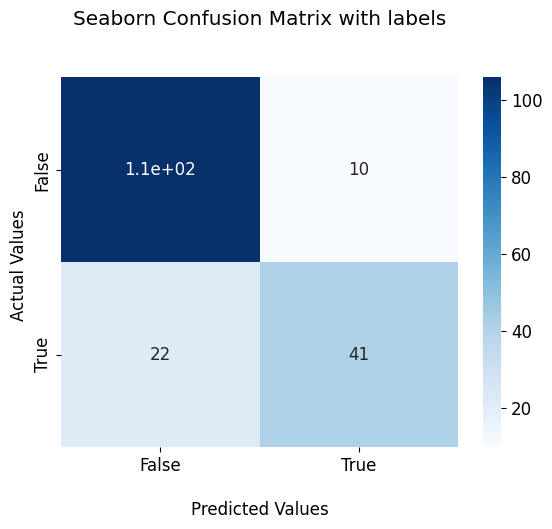

In [349]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix

y_pred=LogisticRegression.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [350]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred=LogisticRegression.predict(x_test)
print(classification_report(y_test,y_pred))

accracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)

print (f'logictic regression model Accuracy - : {100*accracy:.3} %')
print (f'logictic regression model f1_score - : {100*f1_score:.3} %')
print (f'logictic regression model precision - : {100*precision:.3} %')
print (f'logictic regression model recall - : {100*recall:.3}  %')

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       116
           1       0.80      0.65      0.72        63

    accuracy                           0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.82       179

logictic regression model Accuracy - : 82.1 %
logictic regression model f1_score - : 71.9 %
logictic regression model precision - : 80.4 %
logictic regression model recall - : 65.1  %


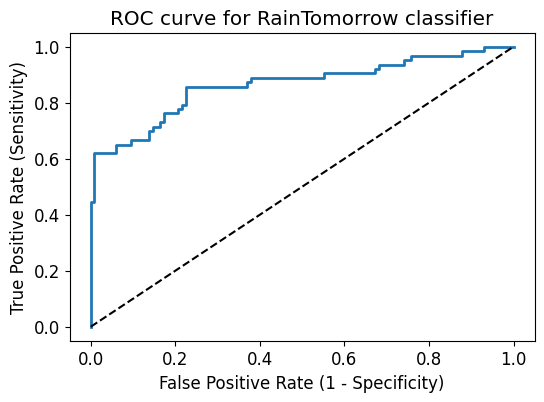

In [351]:
# plot ROC Curve

y_pred1=LogisticRegression.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_test,y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [354]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
print(f'AUC: {auc:.3f}')

AUC: 0.865
